In [1]:
#imports y globals.
import shared.constants  as  const
import shared.supportedFiles as sf
TestFile= const.CSV_FILES[const.TEST_KEY]
TrainFile= const.CSV_FILES[const.TRAIN_KEY]
TrainFile.getModelTypeDetail(fileName= "TRAIN_volcado de todas las variables.txt") 

In [2]:
#comparar los ficheros train y test csv y garantizar que son iguales

TestFile.findDifferences(TrainFile)

['- test_id                                   Numero\n',
 '?  ^^^   -\n',
 '+ train_id                                  Numero\n',
 '?  ^^^^\n',
 '  AA3                                       Numero\n',
 '  AA4                                       Numero\n',
 '  AA5                               Numero (largo)\n',
 '  AA6                               Numero (largo)\n',
 '  AA7                                       Numero\n',
 '  AA14                                      Numero\n',
 '  AA15                                      Numero\n',
 '  DG1                                       Numero\n',
 '+ is_female                                 Numero\n',
 '  DG3                                       Numero\n',
 '  DG3A                                      Numero\n',
 '  DG3A_OTHERS         Cadena de texto AlfaNumerica\n',
 '  DG4                                       Numero\n',
 '- DG4_OTHERS          Cadena de texto AlfaNumerica\n',
 '+ DG4_OTHERS                        Numero (largo)\n',


In [3]:
#verificar que disponemos del significado de todas las columnas del fichero csv de entrenamiento
#para ello comparamos los ficheros con el diccionario proporcionado
print("\n".join(TrainFile.setColumDescriptionsFile(fileFormat =sf.SupportedFiles.EXCEL, filepath="data_sources/WiDS data dictionary v2.xlsx",removeNotFoundColumns=False )))

train_id No encontrada en CSV de datos Accion: Ninguna
AA4 No encontrada en CSV de datos Accion: Ninguna
AA7 No encontrada en CSV de datos Accion: Ninguna
AA14 No encontrada en CSV de datos Accion: Ninguna
AA15 No encontrada en CSV de datos Accion: Ninguna
DG3A_OTHERS No encontrada en CSV de datos Accion: Ninguna
DG4_OTHERS No encontrada en CSV de datos Accion: Ninguna
DG10b No encontrada en CSV de datos Accion: Ninguna
DG10c No encontrada en CSV de datos Accion: Ninguna
DG11b No encontrada en CSV de datos Accion: Ninguna
DG11c No encontrada en CSV de datos Accion: Ninguna
DG13_OTHERS No encontrada en CSV de datos Accion: Ninguna
DG14_OTHERS No encontrada en CSV de datos Accion: Ninguna
DL1_OTHERS No encontrada en CSV de datos Accion: Ninguna
DL2_23_OTHERS No encontrada en CSV de datos Accion: Ninguna
DL2_96_OTHERS No encontrada en CSV de datos Accion: Ninguna
DL4_96 No encontrada en CSV de datos Accion: Ninguna
DL4_99 No encontrada en CSV de datos Accion: Ninguna
DL4_OTHERS No encontr

In [4]:
#localizar los campos vacios en las variables
#y eliminar las que tengan mas del 85% de valores nulos.
print ("Columnas Iniciales: " + str(len(TrainFile.csvFile.columns)))
TrainFile.removeColumnsHavingNulls(85, Silent=True)
print ("Columnas restantes: " + str(len(TrainFile.csvFile.columns)))

Columnas Iniciales: 1235
Columnas restantes: 464


In [5]:
#Normalizar el modelo de datos:
#Remplazar los valores de LN2_RIndLngBEOth	LN2_WIndLngBEOth por valores numericos 
print ("Columnas Iniciales: " + str(len(TrainFile.csvFile.columns)))
TrainFile.replaceColumnTextByDictionaryValues(const.LANGUAGES, 'LN2_RIndLngBEOth',naValue='0')
TrainFile.replaceColumnTextByDictionaryValues(const.LANGUAGES, 'LN2_WIndLngBEOth',naValue='0')
TrainFile.setColumnsType( {'LN2_RIndLngBEOth':int,'LN2_WIndLngBEOth':int})
#eliminar columnas con constantes y valores de texto (cualitativas). Se consideran constantes aquellas que tengan una desviacion típica por debajo de 0.1
TrainFile.removeUselessColumns ( dropConstants=True, dropQualifiyingColums=True, stdThreshold=0.1, Silent=False)
print ("removeUselessColumns Columnas restantes: " + str(len(TrainFile.csvFile.columns)))
#mostrar el estado actual del modelo de datos antes de cubrir gaps (nulos) utilizando una regresion multivariable 
TrainFile.fillGapsUsingMultivariable()
print (" fillGapsUsingMultivariable Columnas restantes: " + str(len(TrainFile.csvFile.columns)))

Columnas Iniciales: 464
 Column:DG5_9 removed : Standart Deviation = 0.05067552002305178
 Column:DG5_96 removed : Standart Deviation = 0.0
 Column:DG13_4 removed : Standart Deviation = 0.06685195336401989
 Column:DG13_96 removed : Standart Deviation = 0.05018840129886815
 Column:DL4_4 removed : Standart Deviation = 0.08114423188716922
 Column:DL4_11 removed : Standart Deviation = 0.0600197997293981
 Column:DL4_12 removed : Standart Deviation = 0.05173964825831504
 Column:DL4_13 removed : Standart Deviation = 0.06180503197098306
 Column:DL4_15 removed : Standart Deviation = 0.039134048163674245
 Column:DL4_21 removed : Standart Deviation = 0.06887020086348962
 Column:DL4_22 removed : Standart Deviation = 0.04958831970292395
 Column:DL4_23 removed : Standart Deviation = 0.0626782958932596
 Column:DL26_10 removed : Standart Deviation = 0.05226350194593666
 Column:MT12_5 removed : Standart Deviation = 0.08079381875561248
 Column:MT12_6 removed : Standart Deviation = 0.03773715414352529
 Co

Columna eliminada: train_id. índice de Pearson: 0.005129537831851708 <= 0.09
Columna eliminada: AA3. índice de Pearson: 0.008179125678106372 <= 0.09
Columna eliminada: AA4. índice de Pearson: 0.028591471082168887 <= 0.09
Columna eliminada: AA5. índice de Pearson: 0.05899355014245337 <= 0.09
Columna eliminada: AA6. índice de Pearson: 0.023352817103094385 <= 0.09
Columna eliminada: AA7. índice de Pearson: 0.028565124473899212 <= 0.09
Columna eliminada: AA14. índice de Pearson: 0.0003381488405574715 <= 0.09
Columna eliminada: AA15. índice de Pearson: 0.0004315161606137712 <= 0.09
Columna eliminada: DG1. índice de Pearson: 0.06782716210451695 <= 0.09
Columna NO eliminada: is_female. índice de Pearson: 1.0 > = 0.09
Columna eliminada: DG3. índice de Pearson: 0.00864642766184308 <= 0.09
Columna eliminada: DG3A. índice de Pearson: 0.04267897451372693 <= 0.09
Columna NO eliminada: DG4. índice de Pearson: 0.09995168307546465 > = 0.09
Columna eliminada: DG5_1. índice de Pearson: 0.005085225977287

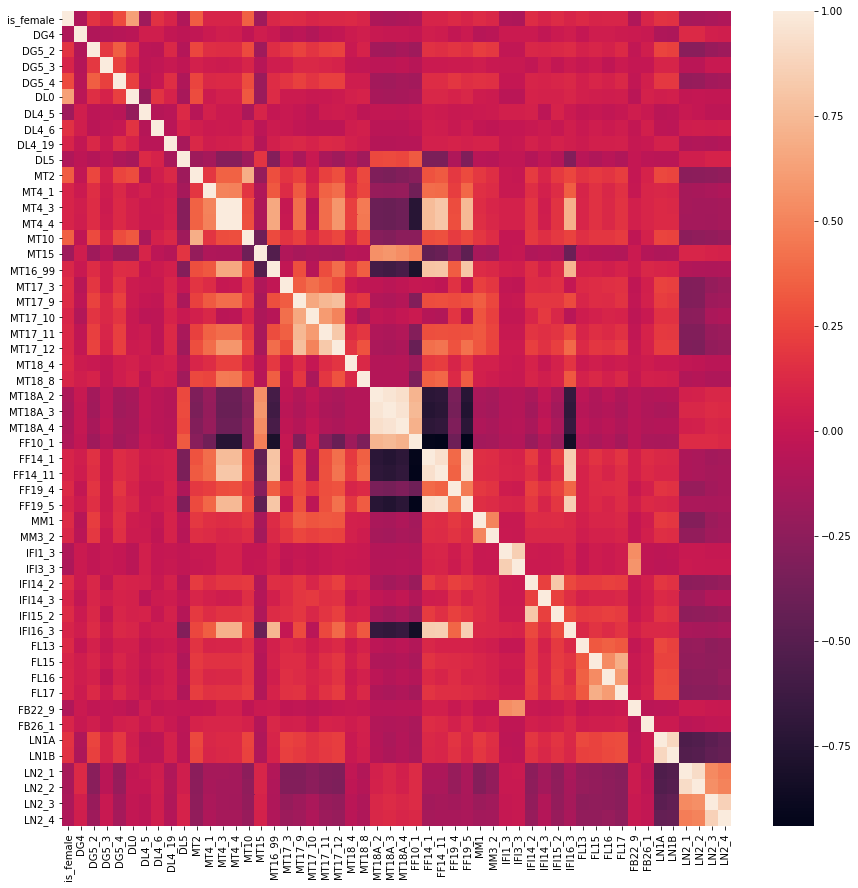

In [6]:
#Eliminar columnas con un coef. de pearson menor de 0.09 siendo 1 el maximo y 0 no relación 
#para eliminar aquellas que no tengan una gran capacidad explicativa. El calculo considera
#valores absolutos para tener en consideración correlaciones inversas. (-)
#considerando valores absolutos
#imports y globals.
TrainFile.removeColPearsonCriteria(0.09,'is_female')
print ("Columnas restantes: " + str(len(TrainFile.csvFile.columns)))
#mostrar grafica de "calor" con las correlaciones en el fichero train.
TrainFile.getHeatMap("pearson", 15,15)


In [7]:
#Eliminar columnas train_id y is_female del fichero train (train_id se ha ido ya por la falta de correlacion)
TrainFile.dropColumn('is_female')
print ("Columnas restantes: " + str(len(TrainFile.csvFile.columns)))

Columnas restantes: 51


In [8]:
#PREPARACION MODELO DE TEST
#localizar los campos vacios en las variables
#y eliminar las que tengan mas del 85% de valores nulos.

print ("Columnas Iniciales: " + str(len(TrainFile.csvFile.columns)))
TestFile.removeColumnsHavingNulls(85, Silent=True)
print ("Columnas restantes: " + str(len(TrainFile.csvFile.columns)))

Columnas Iniciales: 51
Columnas restantes: 51


In [9]:
#Normalizar el modelo de datos:
#Remplazar los valores de LN2_RIndLngBEOth	LN2_WIndLngBEOth por valores numericos 
print ("Columnas Iniciales: " + str(len(TestFile.csvFile.columns)))
TestFile.replaceColumnTextByDictionaryValues(const.LANGUAGES, 'LN2_RIndLngBEOth',naValue='0')
TestFile.replaceColumnTextByDictionaryValues(const.LANGUAGES, 'LN2_WIndLngBEOth',naValue='0')
TestFile.setColumnsType( {'LN2_RIndLngBEOth':int,'LN2_WIndLngBEOth':int})
#eliminar columnas con constantes y valores de texto (cualitativas). Se consideran constantes aquellas que tengan una desviacion típica por debajo de 0.1
TestFile.removeUselessColumns ( dropConstants=True, dropQualifiyingColums=True, stdThreshold=0.1, Silent=False)
print ("removeUselessColumns Columnas restantes: " + str(len(TestFile.csvFile.columns)))
#mostrar el estado actual del modelo de datos antes de cubrir gaps (nulos) utilizando una regresion multivariable 
TestFile.fillGapsUsingMultivariable()
print ("fillGapsUsingMultivariable Columnas restantes: " + str(len(TestFile.csvFile.columns)))


Columnas Iniciales: 530
 Column:DG5_9 removed : Standart Deviation = 0.05339046109150373
 Column:DG5_96 removed : Standart Deviation = 0.0
 Column:DG13_4 removed : Standart Deviation = 0.07635545128311907
 Column:DG13_96 removed : Standart Deviation = 0.045570145555981476
 Column:DL4_4 removed : Standart Deviation = 0.0805057260182282
 Column:DL4_11 removed : Standart Deviation = 0.05130155166043269
 Column:DL4_12 removed : Standart Deviation = 0.05339046109150372
 Column:DL4_13 removed : Standart Deviation = 0.06393723449432527
 Column:DL4_14 removed : Standart Deviation = 0.0943327353314654
 Column:DL4_15 removed : Standart Deviation = 0.04276857042577627
 Column:DL4_21 removed : Standart Deviation = 0.07369569032947454
 Column:DL4_22 removed : Standart Deviation = 0.05200728147335307
 Column:DL4_23 removed : Standart Deviation = 0.05890368273854528
 Column:DL26_10 removed : Standart Deviation = 0.05270346007471441
 Column:G2P1_3 removed : Standart Deviation = 0.09295869293410472
 Co

TypeError: could not convert string to float: 'I don\x92t  know about mobile money service'